## PROTEUS2 protein secondary structure analysis:

### This is a notebook to combine and evaluate the protein secondary structure output for all algae rot proteomics samples

### Output means:

- H = Helix
- E = Beta Strand
- C = Coil
- T = Membrane helix
- B = Membrane strand
- S = Signal peptide
- c = Cleavage site

In [1]:
cd /home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/

/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2


In [2]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [3]:
ls

'Day12_325 PeaksDB_dia_mem_prot_trypsin_totals'
 PeaksDB_322_prot_trypsin_totals
 PeaksDB_323_prot_trypsin_totals
 PeaksDB_324_prot_trypsin_totals
 PeaksDB_325_prot_trypsin_totals
 PeaksDB_329_prot_undigested_totals
 PeaksDB_330_prot_undigested_totals
 PeaksDB_331_prot_undigested_totals
 PeaksDB_332_prot_undigested_totals
 T0_322_trypsin_PeaksDB_protein_proteus
 T0_322_trypsin_PeaksDB_protein_proteus_sort.csv
 T0_322_trypsin_PeaksDB_protein_proteus.txt
 T0_329_undigested_PeaksDB_protein_proteus
 T0_329_undigested_PeaksDB_protein_proteus_sort.csv
 T0_329_undigested_PeaksDB_protein_proteus.txt
 T12-325-trypsin-DB-diatom-membrane.fasta
 T12-325-trypsin-DB-diatom-membrane-noX.fasta
 T12-325-trypsin-DB-diatom-membrane-proteins
 T12-325-trypsin-DB-diatom-membrane-proteins_sort.csv
 T12-325-trypsin-DB-diatom-membrane-proteins.txt
 T12_325_trypsin_PeaksDB_protein_proteus
 T12_325_trypsin_PeaksDB_protein_proteus_sort.csv
 T12_325_trypsin_PeaksDB_protein_proteus.txt
 T12_332_undigested_PeaksDB_p

In [12]:
# For each of the algae rot samples, read in Proteus2 overall %'s csvs and combine

PeaksDB_322_tryp = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_322_prot_trypsin_totals")
PeaksDB_323_tryp = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_323_prot_trypsin_totals")
PeaksDB_324_tryp = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_324_prot_trypsin_totals")
PeaksDB_325_tryp = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_325_prot_trypsin_totals")

frames = [PeaksDB_322_tryp, PeaksDB_323_tryp, PeaksDB_324_tryp, PeaksDB_325_tryp]

index = ['PeaksDB_322_tryp', 'PeaksDB_323_tryp', 'PeaksDB_324_tryp', 'PeaksDB_325_tryp']

# concatenate dataframes

PeaksDB_Proteus_total = pd.concat(frames, sort=False, ignore_index=True)


# delete useless columns

del PeaksDB_Proteus_total['% C total']
del PeaksDB_Proteus_total['% H total']
del PeaksDB_Proteus_total['% E total']
del PeaksDB_Proteus_total['% T total']
del PeaksDB_Proteus_total['% B total']
del PeaksDB_Proteus_total['% S total']
del PeaksDB_Proteus_total['% c total']
del PeaksDB_Proteus_total['% check sum']
del PeaksDB_Proteus_total['overall % sum']

# rename columns

PeaksDB_Proteus_total.columns = ['sample', '% coil', '% helix', '% beta strand', \
                                 '% membrane helix', '% membrane beta strand', '% signal peptide', '% cleavage site']

# Go from faction space to percentages

PeaksDB_Proteus_total['% coil'] = PeaksDB_Proteus_total['% coil']*100
PeaksDB_Proteus_total['% helix'] = PeaksDB_Proteus_total['% helix']*100
PeaksDB_Proteus_total['% beta strand'] = PeaksDB_Proteus_total['% beta strand']*100
PeaksDB_Proteus_total['% membrane helix'] = PeaksDB_Proteus_total['% membrane helix']*100
PeaksDB_Proteus_total['% membrane beta strand'] = PeaksDB_Proteus_total['% membrane beta strand']*100
PeaksDB_Proteus_total['% signal peptide'] = PeaksDB_Proteus_total['% signal peptide']*100
PeaksDB_Proteus_total['% cleavage site'] = PeaksDB_Proteus_total['% cleavage site']*100


PeaksDB_Proteus_total['Timepoint']= ['T0', 'T2', 'T5', 'T12']

del PeaksDB_Proteus_total['sample']


PeaksDB_Proteus_trypsin = PeaksDB_Proteus_total.reindex(columns= ['Timepoint', '% coil', '% helix', '% beta strand', \
                                 '% membrane helix', '% membrane beta strand', '% signal peptide', '% cleavage site'])

PeaksDB_Proteus_trypsin.head(8)

,Timepoint,% coil,% helix,% beta strand,% membrane helix,% membrane beta strand,% signal peptide,% cleavage site
0,T0,54.527328,26.376233,15.021523,3.631775,0.443142,0.0,0.0
1,T2,56.189261,26.533383,14.418915,2.262583,0.595858,0.0,0.0
2,T5,53.307081,23.440002,11.694695,11.005082,0.553140,0.0,0.0
3,T12,56.752497,22.811483,9.982389,9.276020,1.177611,0.0,0.0


In [10]:
# For each of the algae rot samples, read in Proteus2 overall %'s csvs and combine

PeaksDB_329_undig = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_329_prot_undigested_totals")
PeaksDB_330_undig = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_330_prot_undigested_totals")
PeaksDB_331_undig = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_331_prot_undigested_totals")
PeaksDB_332_undig = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_332_prot_undigested_totals")

frames = [PeaksDB_329_undig, PeaksDB_330_undig, PeaksDB_331_undig, PeaksDB_332_undig]

index = ['PeaksDB_329_undig', 'PeaksDB_330_undig', 'PeaksDB_331_undig', 'PeaksDB_332_undig']

# concatenate dataframes

PeaksDB_Proteus_total = pd.concat(frames, sort=False, ignore_index=True)

# delete useless columns

del PeaksDB_Proteus_total['% C total']
del PeaksDB_Proteus_total['% H total']
del PeaksDB_Proteus_total['% E total']
del PeaksDB_Proteus_total['% T total']
del PeaksDB_Proteus_total['% B total']
del PeaksDB_Proteus_total['% S total']
del PeaksDB_Proteus_total['% c total']
del PeaksDB_Proteus_total['% check sum']
del PeaksDB_Proteus_total['overall % sum']


# rename columns

PeaksDB_Proteus_total.columns = ['sample', '% coil', '% helix', '% beta strand', \
                                 '% membrane helix', '% membrane beta strand', '% signal peptide', '% cleavage site']

# Go from faction space to percentages

PeaksDB_Proteus_total['% coil'] = PeaksDB_Proteus_total['% coil']*100
PeaksDB_Proteus_total['% helix'] = PeaksDB_Proteus_total['% helix']*100
PeaksDB_Proteus_total['% beta strand'] = PeaksDB_Proteus_total['% beta strand']*100
PeaksDB_Proteus_total['% membrane helix'] = PeaksDB_Proteus_total['% membrane helix']*100
PeaksDB_Proteus_total['% membrane beta strand'] = PeaksDB_Proteus_total['% membrane beta strand']*100
PeaksDB_Proteus_total['% signal peptide'] = PeaksDB_Proteus_total['% signal peptide']*100
PeaksDB_Proteus_total['% cleavage site'] = PeaksDB_Proteus_total['% cleavage site']*100

PeaksDB_Proteus_total['Timepoint']= ['T0', 'T2', 'T5', 'T12']

del PeaksDB_Proteus_total['sample']

PeaksDB_Proteus_undig = PeaksDB_Proteus_total.reindex(columns= ['Timepoint', '% coil', '% helix', '% beta strand', \
                                 '% membrane helix', '% membrane beta strand', '% signal peptide', '% cleavage site'])


PeaksDB_Proteus_undig.head(8)

,Timepoint,% coil,% helix,% beta strand,% membrane helix,% membrane beta strand,% signal peptide,% cleavage site
0,T0,50.253661,30.266127,14.880274,3.990969,0.608969,0.000000,0.000000
1,T2,45.437619,31.141341,15.065697,5.911941,0.627499,1.795519,0.020383
2,T5,48.198365,26.425044,15.080293,9.874841,0.013074,0.039223,0.369160
3,T12,46.174222,31.028089,9.601973,13.195717,0.000000,0.000000,0.000000


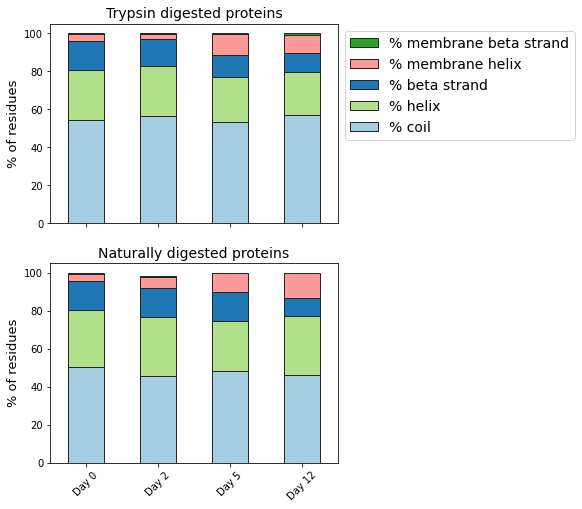

In [13]:
# plot secondary structure predictions

colors = '#d73027', '#fc8d59', '#fee090', '#91cf60', '#e0f3f8', '#91bfdb', '#4575b4'

colors2 = '#a6cee3', '#b2df8a', '#1f78b4', '#fb9a99', '#33a02c'

fig, axes = plt.subplots(figsize=(5, 7),nrows=2, ncols=1)
plt.tight_layout()

plt.subplots_adjust(left=0.15, bottom=0.1, right=None, top=None, wspace= 0.9, hspace= 0.20)

PeaksDB_Proteus_trypsin.plot(ax=axes[0], y = ['% coil', '% helix', '% beta strand', '% membrane helix', \
                                               '% membrane beta strand'], kind='bar', stacked=True, \
                             color = colors2, edgecolor = '#252525')

PeaksDB_Proteus_undig.plot(ax=axes[1], y = ['% coil', '% helix', '% beta strand', '% membrane helix', \
                                               '% membrane beta strand'], kind='bar', stacked=True, \
                           color = colors2, edgecolor = '#252525')

axes[0].set_title('Trypsin digested proteins', fontsize = 14)
axes[0].set_ylabel("% of residues", fontsize = 13)
#axes[0].legend(bbox_to_anchor=(1,1), loc="upper left", fontsize = 14)
axes[0].set_xticklabels( ('', '','', ''), rotation = 45)

axes[1].set_title('Naturally digested proteins', fontsize = 14)
axes[1].set_ylabel("% of residues", fontsize = 13)
axes[1].get_legend().remove()
axes[1].set_xticklabels(('Day 0', 'Day 2','Day 5', 'Day 12'), rotation = 45)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[::-1], labels[::-1], bbox_to_anchor=(1,1), loc="upper left", fontsize = 14)

plt.savefig('/home/millieginty/Documents/git-repos/rot-mayer/figures/fig3-proteus.png', dpi=400)